In [99]:
#Importando las librerías útiles
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer

In [100]:
#funcion principal regresa r paralelo y r perpendicular
def rcomponents(x,y):
    pm = (x[0:3]+y[0:3])/2
    r = pm - pobs
    runit = r/np.linalg.norm(r)
    rab = x[:3]-y[:3]
    r_paralelo = np.dot(runit,rab)
    r_paralelo = abs(r_paralelo)
    rab = np.linalg.norm(rab)
    r_perpendicular = np.sqrt(rab**2 - r_paralelo**2)
    return r_paralelo, r_perpendicular


In [101]:
#Importando datos
datos = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/data_10K.dat')
rand = np.loadtxt('/home/alejandrogoper/Documentos/ProyectoCosmologia/BF_Alg/CodigosAlejandro/rand0_10K.dat')
#longitud de la lista datos es la cantidad total de datos
N=len(datos)

In [102]:
#Definiendo numero de particiones, distancia de interés y punto de observacion
n = 25
d_max = 130
pobs = np.array([125,125,125])

73.59695674582079 200.23429181194317


In [103]:
#Creando archivo de Posiciones x (punto medio) e inicializando histogramas 
x=[]
DD = np.zeros((n,n), dtype=int)
DR = np.zeros((n,n), dtype=int)
RR = np.zeros((n,n), dtype=int)
for i in range(n):
    x.append((i+1/2)*d_max/n)
#pasamos la lista x a un array 
x = np.array(x)

In [104]:
#Programa principal
# 
# Ciclo principal para histogramas DD y RR

to=timer()
for i in range(N-1):
    for j in range(i+1,N):
        r_pll_d, r_per_d = rcomponents(datos[i],datos[j])
        r_pll_r, r_per_r = rcomponents(rand[i],rand[j])
        if((r_pll_d < d_max)):
            if(r_per_d < d_max):
                DD[int(r_pll_d*n/d_max)][int(r_per_d*n/d_max)]+=2
        if((r_pll_r < d_max)):
            if((r_per_r < d_max)):
                DD[int(r_pll_r*n/d_max)][int(r_per_r*n/d_max)]+=2
tf=timer()
print(tf-to)

2662.921583105992


In [105]:
#ciclo para histograma DR
to = timer()
for i in range(N):
    for j in range(N):
        r_pll_dr, r_per_dr = rcomponents(datos[i],rand[j])
        if(r_pll_dr < d_max):
            if(r_per_dr < d_max):
                DR[int(r_pll_dr*n/d_max)][int(r_per_dr*n/d_max)] += 1

tf = timer()
print((tf-to)/60)

#Contruyendo estimadores
#Estimador LS

eLS = (DD-2*DR+RR)/RR

#EStimador HAM

eHAM = (DD*RR)/(DR**2) -1 

43.69654362963338


In [106]:
#Construyendo imagen
#X -- blur
#Y -- titulo
#t -- el nombre de la etiqueta al lado de los cuadritos
def imag(x,y,t,cmap):
    plt.figure(figsize=(6,6), dpi=100)
    plt.imshow(x,origin='lower',cmap=cmap)
    plt.contour(x,30,cmap=plt.cm.gray,linewidths=1)
    plt.ylabel('$r_{\pi}$',fontsize = 16)
    plt.xlabel('$r_{p}$',fontsize = 16)
    plt.title(y,fontsize = 16)
    plt.subplots_adjust(bottom=0.1, right=0.8, top=0.9)
    cax=plt.colorbar()
    cax.set_label(t,labelpad = 15,fontsize = 15)
    line_colour1 = ('royalblue', 'blue', 'mediumblue', 'darkblue')
    plt.plot()


In [111]:
#hacemos un suavizado de la imagen 
import cv2
p = 2
sig = 1

blur_OH = cv2.blur(eLS,(p,p))


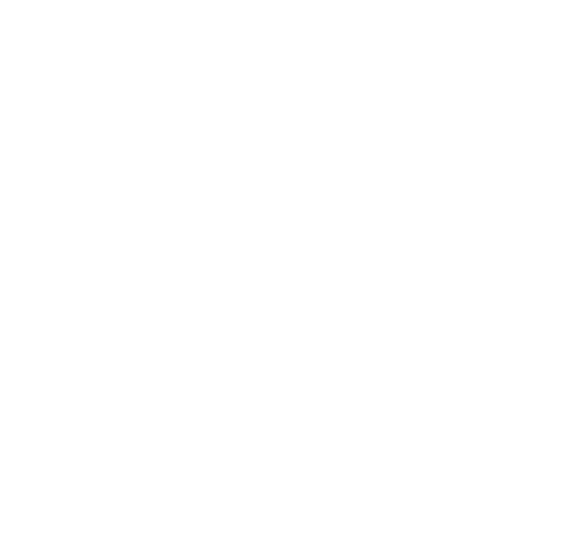

In [112]:
import scipy.misc
from scipy import ndimage
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10,10))
gs1 = gridspec.GridSpec(2, 2)
gs1.update(wspace=0.0, hspace=0.0) # set the spacing between axes. 

ax1 = plt.subplot(gs1[0])
rotated_img = ndimage.rotate(np.rot90(blur_OH), 90)
plt.imshow(rotated_img, cmap=plt.cm.rainbow)
plt.contour(rotated_img,30,cmap=plt.cm.gray,linewidths=1)
plt.axis('off')
ax1 = plt.subplot(gs1[1])
rotated_img = ndimage.rotate(blur_OH.T,90)
plt.imshow(rotated_img, cmap=plt.cm.rainbow)
plt.contour(rotated_img,30,cmap=plt.cm.gray,linewidths=1)
plt.axis('off')
ax1 = plt.subplot(gs1[2])
rotated_img = ndimage.rotate(blur_OH.T,-90)
plt.imshow(rotated_img, cmap=plt.cm.rainbow)
plt.contour(rotated_img,30,cmap=plt.cm.gray,linewidths=1)
plt.axis('off')
ax1 = plt.subplot(gs1[3])
rotated_img = ndimage.rotate(blur_OH, 0)
plt.imshow(rotated_img, cmap=plt.cm.rainbow)
plt.contour(rotated_img,30,cmap=plt.cm.gray,linewidths=1)
plt.axis('off')
plt.show()


In [109]:
imag(blur_OH.T,'Función de Correlación','$\epsilon(r)$',cmap=plt.cm.rainbow)

IndexError: index 2 is out of bounds for axis 0 with size 2